In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-10-07_56_20/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

4001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

# Accuracy
accuracy = { k: v for k, v in enumerate(data["accuracy"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

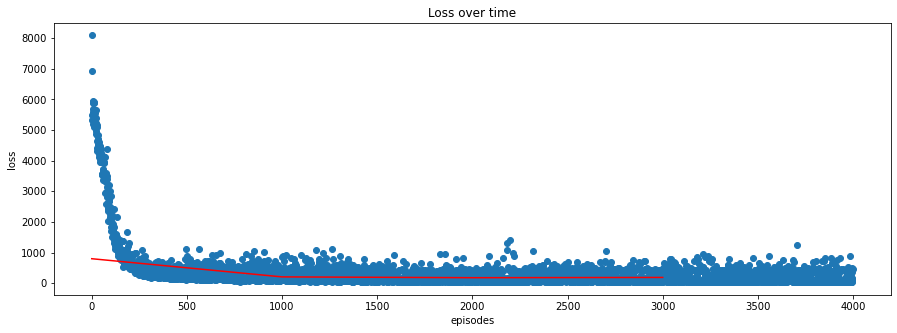

Maximum: 8095.0615234375
Average: 340.9690350529909
Moving Average: ['-74% (203.40927938028767 | -74%)', '-12% (177.22970781697856 | -77%)', '+4% (185.51246168233968 | -76%)']
Minimum: 21.956771850585938


In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

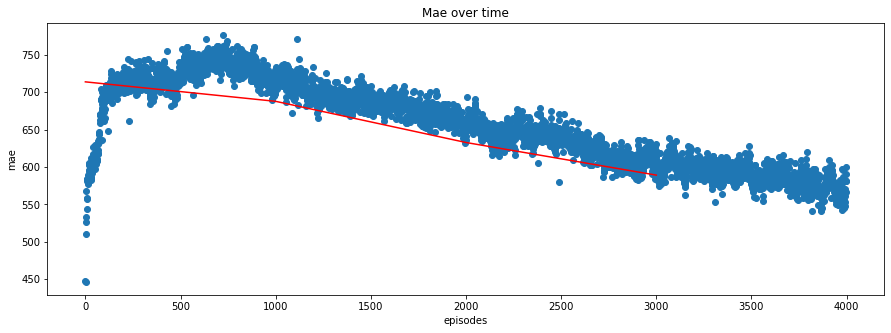

Maximum: 775.9161987304688
Average: 655.866720782521
Moving Average: ['-3% (687.7350408990424 | -3%)', '-8% (632.7127983100884 | -11%)', '-6% (589.1086571801294 | -17%)']
Minimum: 445.68121337890625


In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

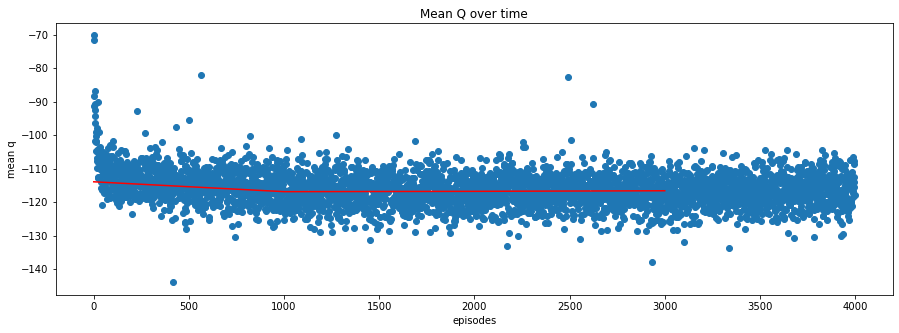

Maximum: -70.22703475952149
Average: -116.06246705547694
Moving Average: []
Minimum: -143.99771118164062


In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

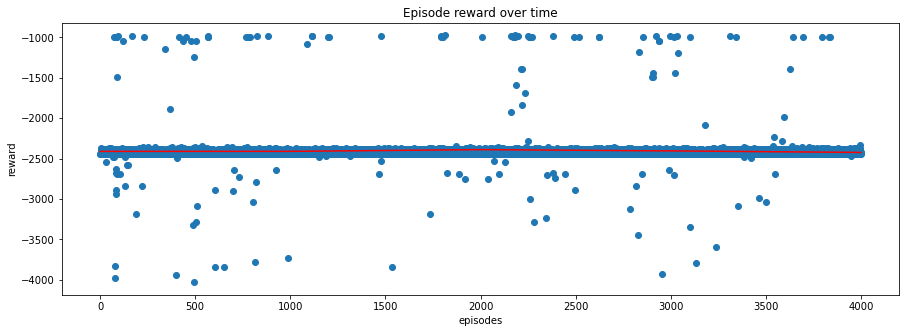

Maximum: -974.0
Average: -2403.821794551374
Moving Average: []
Minimum: -4034.0


In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

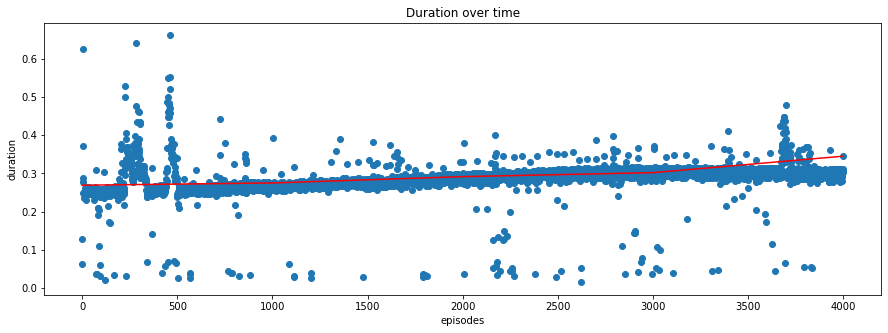

Maximum: 0.6608486000000084
Average: 0.28429311969507604
Moving Average: ['+2% (0.2749030070929076 | 2%)', '+6% (0.2914122189810192 | 8%)', '+3% (0.30183872047951943 | 12%)', '+14% (0.3448608000001059 | 28%)']
Minimum: 0.014748700000041026


In [9]:
plot(duration, "Duration over time", "episodes", "duration")

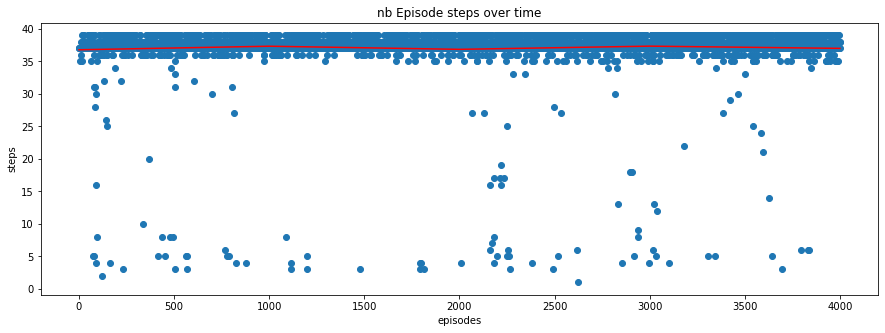

Maximum: 39
Average: 37.07548112971757
Moving Average: ['+1% (37.32967032967033 | 1%)', '-1% (36.85114885114885 | 0%)', '+1% (37.34065934065934 | 1%)', '0% (37.0 | 0%)']
Minimum: 1


In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

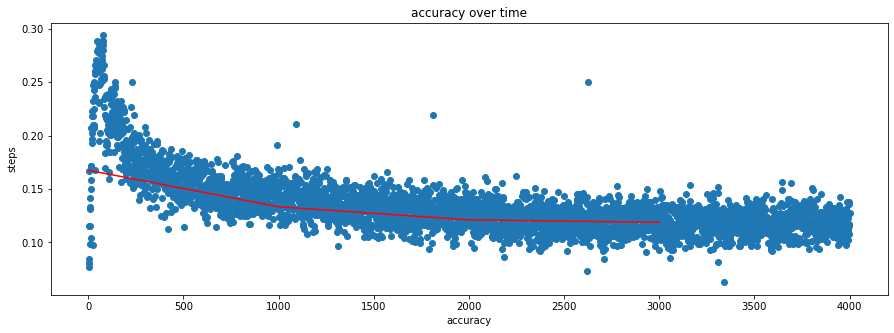

Maximum: 0.29374998807907104
Average: 0.1351551388883388
Moving Average: ['-20% (0.13328961724346572 | -20%)', '-9% (0.12107873049292055 | -27%)', '-1% (0.11878000561509643 | -29%)']
Minimum: 0.0625


In [11]:
plot(accuracy, "accuracy over time", "accuracy", "steps")